### 1 Import library and load data

In [55]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("../../data/taxi_trip_pricing_imputed.csv")

display(df.head())
df.info()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Time_of_Day_Unknown,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_Low,Traffic_Conditions_Medium,Traffic_Conditions_Unknown,Weather_Rain,Weather_Snow,Weather_Unknown
0,19.35,3.0,3.560000,0.80,0.32,53.82,36.262400,False,True,False,False,True,False,True,False,False,False,False,False
1,47.59,1.0,16.954929,0.62,0.43,40.57,45.693681,False,False,False,False,True,False,False,False,False,False,False,False
2,36.87,1.0,2.700000,1.21,0.15,37.27,52.903200,True,False,False,False,False,True,False,False,False,False,False,False
3,30.33,4.0,3.480000,0.51,0.15,116.81,36.469800,True,False,False,False,True,False,True,False,False,False,False,True
4,8.64,3.0,2.930000,0.63,0.32,22.64,15.618000,True,False,False,False,True,False,False,False,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Trip_Distance_km            1000 non-null   float64
 1   Passenger_Count             1000 non-null   float64
 2   Base_Fare                   1000 non-null   float64
 3   Per_Km_Rate                 1000 non-null   float64
 4   Per_Minute_Rate             1000 non-null   float64
 5   Trip_Duration_Minutes       1000 non-null   float64
 6   Trip_Price                  1000 non-null   float64
 7   Time_of_Day_Evening         1000 non-null   bool   
 8   Time_of_Day_Morning         1000 non-null   bool   
 9   Time_of_Day_Night           1000 non-null   bool   
 10  Time_of_Day_Unknown         1000 non-null   bool   
 11  Day_of_Week_Weekday         1000 non-null   bool   
 12  Day_of_Week_Weekend         1000 non-null   bool   
 13  Traffic_Conditions_Low      1000 n

### 1.5 Feeature engineering

### 2 Divide the data in features and target. And into Train and tests.

In [68]:
from sklearn.model_selection import train_test_split

X,y = df.drop(columns=[
    "Trip_Price", "Base_Fare", "Per_Km_Rate", "Trip_Duration_Minutes", "Traffic_Conditions_Low", "Traffic_Conditions_Medium", "Per_Minute_Rate", "Traffic_Conditions_Unknown"
   ]), df["Trip_Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 11)

(200, 11)

(800,)

(200,)

In [69]:
display(X.head())
display(y)

,Trip_Distance_km,Passenger_Count,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Time_of_Day_Unknown,Day_of_Week_Weekday,Day_of_Week_Weekend,Weather_Rain,Weather_Snow,Weather_Unknown
0,19.35,3.0,False,True,False,False,True,False,False,False,False
1,47.59,1.0,False,False,False,False,True,False,False,False,False
2,36.87,1.0,True,False,False,False,False,True,False,False,False
3,30.33,4.0,True,False,False,False,True,False,False,False,True
4,8.64,3.0,True,False,False,False,True,False,False,False,False


0      36.262400
1      45.693681
2      52.903200
3      36.469800
4      15.618000
         ...    
995    34.404900
996    62.129500
997    33.123600
998    61.209000
999    45.443700
Name: Trip_Price, Length: 1000, dtype: float64

### 3 Scale features and train a Linnear Regression model

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


scalar = MinMaxScaler()

X_train_scaled = scalar.fit_transform(X=X_train)
X_test_scaled = scalar.transform(X=X_test)

linnear_model = LinearRegression()
linnear_model.fit(X=X_train_scaled, y=y_train)

linnear_y_pred = linnear_model.predict(X=X_test_scaled)


mae_lr = mean_absolute_error(y_true=y_test, y_pred=linnear_y_pred)
mse_lr = mean_squared_error(y_true=y_test, y_pred=linnear_y_pred)
r2_lr = r2_score(y_true=y_test, y_pred=linnear_y_pred)

print("Linnear regression performance:")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"R-squared (R2): {r2_lr:.2f}")

Linnear regression performance:
Mean Absolute Error (MAE): 8.54
Mean Squared Error (MSE): 150.65
R-squared (R2): 0.82


### 4- Train a random forest model

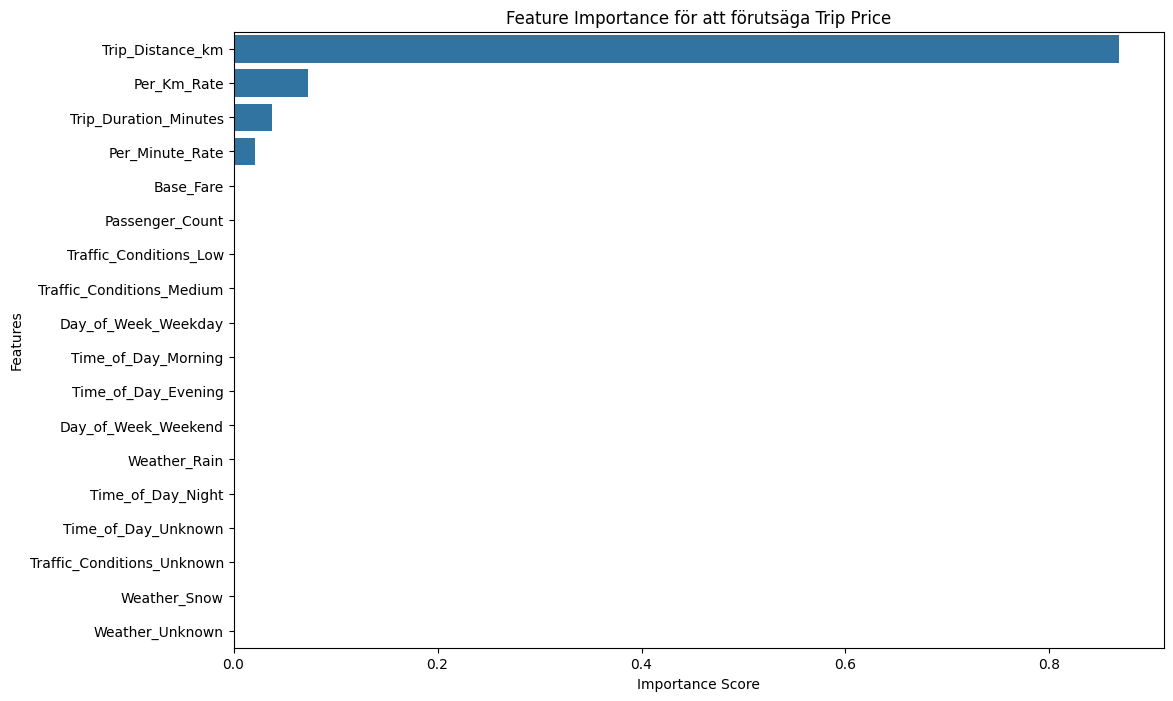

Random forrest regression performance:
Mean Absolute Error (MAE): 5.30
Mean Squared Error (MSE): 46.89
R-squared (R2): 0.94


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    random_state=42,
    n_estimators=2000,
    min_samples_leaf=10,
    max_depth=6,
    max_leaf_nodes=63,
)

rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_true=y_test, y_pred=rf_y_pred)
mse_rf = mean_squared_error(y_true=y_test, y_pred=rf_y_pred)
r2_rf = r2_score(y_true=y_test, y_pred=rf_y_pred)

print("Random forrest regression performance:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")

### Save this broad Unprecise Model to a joblib file as 'broad_responsible_model.joblib'

In [60]:
#import joblib
# Save Random forest model
#joblib.dump(rf_model, "../models/broad_responsible_rf_model.joblib")

### Know we will build a 'narrow_precise_model.joblib' that removes the outlieers

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,1000.0,26.991948,19.650590,1.2300,12.662500,25.8300,38.330000,146.067047
Passenger_Count,1000.0,2.477000,1.103036,1.0000,1.000000,2.0000,3.000000,4.000000
Base_Fare,1000.0,3.685663,2.127699,2.0100,2.730000,3.5300,4.290000,39.613370
Per_Km_Rate,1000.0,1.231410,0.429346,0.5000,0.860000,1.2200,1.610000,2.000000
Per_Minute_Rate,1000.0,0.294765,0.123743,0.1000,0.190000,0.2900,0.390000,1.732901
Trip_Duration_Minutes,1000.0,62.150649,31.946301,5.0100,36.010000,62.1200,88.480000,119.840000
Trip_Price,1000.0,56.630227,39.776855,6.1269,33.821632,50.0962,69.052125,332.043689


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Trip_Distance_km            1000 non-null   float64
 1   Passenger_Count             1000 non-null   float64
 2   Base_Fare                   1000 non-null   float64
 3   Per_Km_Rate                 1000 non-null   float64
 4   Per_Minute_Rate             1000 non-null   float64
 5   Trip_Duration_Minutes       1000 non-null   float64
 6   Trip_Price                  1000 non-null   float64
 7   Time_of_Day_Evening         1000 non-null   bool   
 8   Time_of_Day_Morning         1000 non-null   bool   
 9   Time_of_Day_Night           1000 non-null   bool   
 10  Time_of_Day_Unknown         1000 non-null   bool   
 11  Day_of_Week_Weekday         1000 non-null   bool   
 12  Day_of_Week_Weekend         1000 non-null   bool   
 13  Traffic_Conditions_Low      1000 n

In [63]:
df_narrow = df.copy()

In [64]:
def remove_outlieers(df: pd.DataFrame, column_name: str, show_output: bool = True):

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if show_output:
        print(f"For {column_name}:")
        print(f"Q1: {Q1:.2f}")
        print(f"Q3: {Q3:.2f}")
        print(f"IQR: {IQR:.2f}")
        print(f"(Lower Bound): {lower_bound:.2f}")
        print(f"(Upper Bound): {upper_bound:.2f}")
    
    print(f"Number of rows before removal: {df.shape[0]}")

    df_narrow = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    print(f"Number of rows after outlieer removal: {df_narrow.shape[0]}")

    return df_narrow

In [65]:
df_narrow = remove_outlieers(df_narrow, "Trip_Distance_km")
print("\n")
df_narrow = remove_outlieers(df_narrow, "Trip_Price")

For Trip_Distance_km:
Q1: 12.66
Q3: 38.33
IQR: 25.67
(Lower Bound): -25.84
(Upper Bound): 76.83
Number of rows before removal: 1000
Number of rows after outlieer removal: 980


For Trip_Price:
Q1: 33.51
Q3: 67.23
IQR: 33.73
(Lower Bound): -17.08
(Upper Bound): 117.82
Number of rows before removal: 980
Number of rows after outlieer removal: 973


### Train new RF model on narrow less data with removed Outlieers

In [66]:
X,y = df_narrow.drop(columns=[
    "Trip_Price", "Base_Fare", "Per_Km_Rate","Per_Km_Rate","Trip_Duration_Minutes", "Traffic_Conditions_Low", "Traffic_Conditions_Medium", "Per_Minute_Rate", 
    ]), df_narrow["Trip_Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(778, 12)

(195, 12)

(778,)

(195,)

In [67]:
narrow_rf_model = RandomForestRegressor(random_state=42)

narrow_rf_model.fit(X_train, y_train)

rf_y_pred = narrow_rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_true=y_test, y_pred=rf_y_pred)
mse_rf = mean_squared_error(y_true=y_test, y_pred=rf_y_pred)
r2_rf = r2_score(y_true=y_test, y_pred=rf_y_pred)

print("Random forrest regression performance:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")

Random forrest regression performance:
Mean Absolute Error (MAE): 13.50
Mean Squared Error (MSE): 295.82
R-squared (R2): 0.38
